# Exploratory data analysis

The purpose of this file is to study relationships between predictors, find correlation, and visualize the behaviour of the response variable.

In [2]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("npf_train.csv")
train_data = train_data.drop(["id", "partlybad"], axis = 1)
class2 = np.array(["nonevent", "event"])
train_data.insert(1, "class2", class2[(train_data["class4"] != "nonevent").astype(int)])

In [3]:
train_data.describe()

,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,...,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,382.072525,3.129971,382.086831,2.940651,382.977945,3.991636,381.990305,2.718960,188.904482,138.932525,...,5.189277,1.593595,5.766543,1.911284,10.623039,7.450957,0.428800,0.366484,0.002963,0.000667
std,11.080110,3.222030,11.055166,2.973224,10.665746,4.184408,11.067589,2.696396,126.716262,93.308852,...,9.773583,0.995472,9.856338,1.183899,6.641686,4.989293,0.316118,0.287019,0.002146,0.000724
min,359.579024,0.053968,359.096905,0.048990,361.904203,0.111492,358.786190,0.037417,3.478842,2.165706,...,-23.900675,0.052584,-24.874583,0.043903,0.295937,0.177836,0.005140,0.003552,0.000243,0.000027
25%,374.398155,0.845635,374.389589,0.789586,375.410833,0.949196,374.324536,0.781563,61.682710,41.627138,...,-1.990758,0.686972,-1.477108,0.761495,4.236750,2.431709,0.125858,0.086265,0.001391,0.000266
50%,380.814198,1.952732,380.727947,1.899320,381.600970,2.272311,380.632912,1.758853,194.669401,144.928347,...,5.958894,1.655681,6.576933,1.945372,11.327445,7.588452,0.402249,0.334264,0.002398,0.000476
75%,389.048782,4.428063,389.028476,4.141001,389.731608,5.960286,388.973036,3.903496,303.114842,222.046026,...,13.039799,2.358992,13.831647,2.828374,16.460523,11.827837,0.669968,0.589098,0.003910,0.000791
max,421.511176,19.460521,421.057843,17.439857,422.627800,20.851661,419.924510,16.656066,426.457432,320.099476,...,27.110436,4.867253,27.938861,5.131955,22.541204,16.830501,1.197271,1.055615,0.012670,0.006277


In [4]:
#Check for NaN columns
train_data.isna().any()

date           False
class2         False
class4         False
CO2168.mean    False
CO2168.std     False
               ...  
UV_A.std       False
UV_B.mean      False
UV_B.std       False
CS.mean        False
CS.std         False
Length: 103, dtype: bool

In [5]:
train_data.dtypes

date            object
class2          object
class4          object
CO2168.mean    float64
CO2168.std     float64
                ...   
UV_A.std       float64
UV_B.mean      float64
UV_B.std       float64
CS.mean        float64
CS.std         float64
Length: 103, dtype: object

Leave-one-station-out cross-validation would fit into our data quite well, as we can logically group the training data based on the year of season. It would be desirable to transform the date into usable data that can be fed to a classification model.

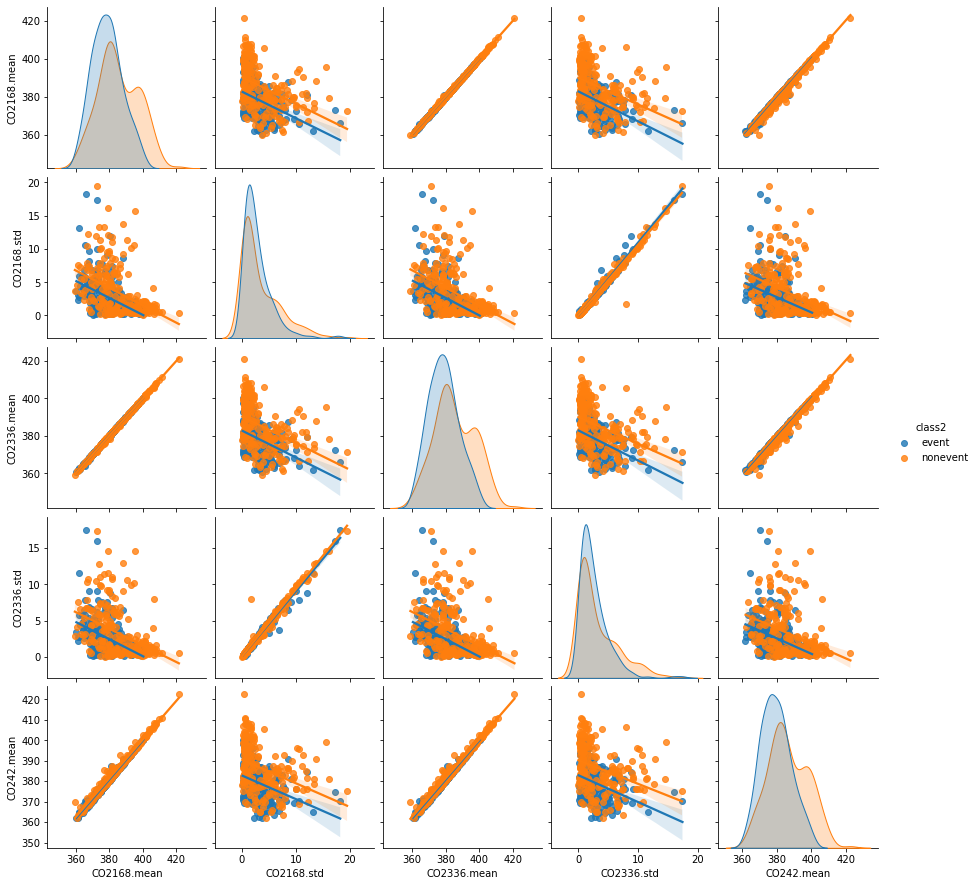

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(train_data, hue = "class2", vars = train_data.columns[3:8], kind = 'reg')
plt.show()

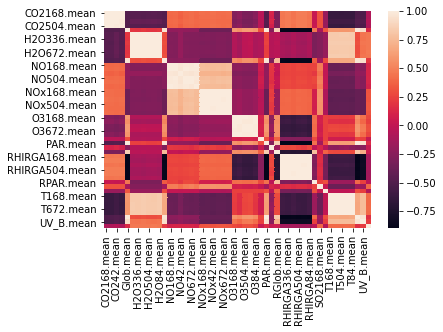

In [7]:
sns.heatmap(train_data.filter(like = '.mean', axis = 1).corr())
plt.show()

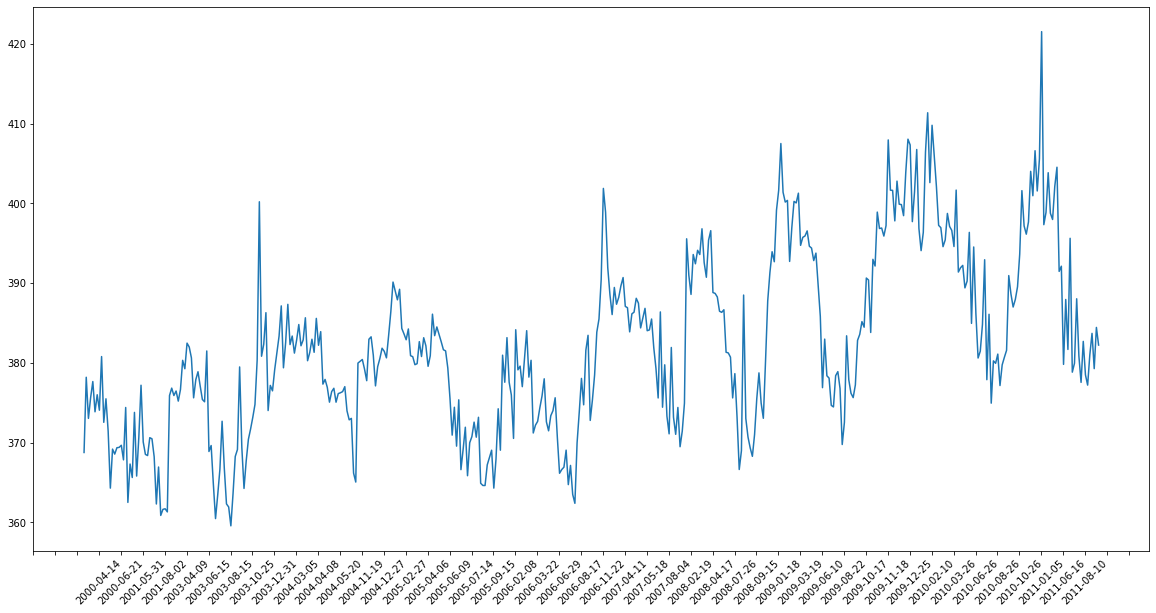

In [8]:
from matplotlib.dates import DateFormatter, DayLocator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


fig, ax = plt.subplots()
ax.plot(train_data["date"], train_data["CO2168.mean"])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 10))
plt.xticks(rotation = 45)
fig.set_figwidth(20)
fig.set_figheight(10)
plt.show()

In [9]:
import datetime

train_data["date"]

train_data["month"] = train_data["date"].map(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d").month)
train_data["month"].head()

0    1
1    2
2    3
3    3
4    4
Name: month, dtype: int64

In [10]:
def mean_by_height(substring):
    return train_data.filter(like = substring).filter(like = ".mean").mean(axis = 1)

def std_by_height(substring):
    return train_data.filter(like = substring).filter(like = ".std").mean(axis = 1)

new_train = pd.DataFrame()
new_train[['date', 'class2', 'month']] = train_data[['date', 'class2', 'month']]
new_train["CO.mean"] = mean_by_height("CO")
new_train["CO.std"] = std_by_height("CO")
new_train["H2O.mean"] = mean_by_height("H2O")
new_train["H2O.std"] = std_by_height("H2O")
new_train["RHIRGA.mean"] = mean_by_height("RHIRGA")
new_train["RHIRGA.std"] = std_by_height("RHIRGA")
new_train["NOx.mean"] = mean_by_height("NOx")
new_train["NOx.std"] = std_by_height("NOx")
new_train["NET.mean"] = mean_by_height("NET")
new_train["NET.std"] = std_by_height("NET")
new_train["NO.mean"] = train_data.iloc[:,27:39].filter(like = ".mean").mean(axis = 1)
new_train["NO.std"] = train_data.iloc[:,27:39].filter(like = ".std").mean(axis = 1)
new_train["O3.mean"] = train_data.iloc[:,51:61].filter(like = ".mean").mean(axis = 1)
new_train["O3.std"] = train_data.iloc[:, 51:61].filter(like = ".std").mean(axis = 1)
new_train[['Pamb0.mean', 'Pamb0.std', 'PAR.mean', 'PAR.std', 'PTG.mean', 'PTG.std', 'RGlob.mean', 'RGlob.std']] = train_data[['Pamb0.mean', 'Pamb0.std', 'PAR.mean', 'PAR.std', 'PTG.mean', 'PTG.std', 'RGlob.mean', 'RGlob.std']]
new_train[['RPAR.mean', 'RPAR.std', 'SO2168.mean', 'SO2168.std', 'SWS.mean', 'SWS.std']] = train_data[['RPAR.mean', 'RPAR.std', 'SO2168.mean', 'SO2168.std', 'SWS.mean', 'SWS.std']]
new_train["T.mean"] = train_data.filter(like = "T").iloc[:,4:].filter(like = ".mean").mean(axis = 1)
new_train["T.std"] = train_data.filter(like = "T").iloc[:,4:].filter(like = ".std").mean(axis = 1)
new_train[['UV_A.mean', 'UV_A.std', 'UV_B.mean', 'UV_B.std', 'CS.mean', 'CS.std', 'month']] = train_data[['UV_A.mean', 'UV_A.std', 'UV_B.mean', 'UV_B.std', 'CS.mean', 'CS.std', 'month']]
new_train.set_index('date')

,class2,month,CO.mean,CO.std,H2O.mean,H2O.std,RHIRGA.mean,RHIRGA.std,NOx.mean,NOx.std,...,SWS.mean,SWS.std,T.mean,T.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
date,,,,,,,,,,,,,,,,,,,,,
2000-01-17,event,1,368.856151,0.312852,4.385509,0.145650,74.786950,3.097176,0.631321,0.084477,...,937.880000,0.600000,-1.082306,0.262913,2.492491,1.310880,0.031587,0.018122,0.000243,0.000035
2000-02-28,nonevent,2,378.245301,1.016608,7.194205,0.196360,100.160630,0.925538,3.833985,0.832196,...,936.000000,0.707107,1.851840,0.284833,0.295937,0.177836,0.005140,0.003552,0.003658,0.000940
2000-03-24,event,3,373.103207,0.751586,3.570243,0.253140,57.585510,14.030853,0.911315,0.205411,...,923.745098,2.161880,0.395391,2.214280,14.434789,8.627312,0.353743,0.272472,0.000591,0.000191
2000-03-30,event,3,375.686078,0.552574,6.512090,0.511100,68.532517,8.792640,2.300339,0.490237,...,925.622642,1.389887,6.207955,2.625127,16.077513,9.984686,0.568242,0.451830,0.002493,0.000466
2000-04-04,nonevent,4,377.742496,0.418522,6.231606,0.201587,89.020758,8.192996,3.069264,0.878602,...,921.727273,2.578074,1.774966,1.531561,9.710422,7.054069,0.339135,0.291457,0.004715,0.000679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-16,nonevent,8,381.505322,4.344077,15.104184,0.262204,78.567805,5.659387,0.279472,0.168602,...,915.250000,1.902379,16.918999,1.212346,8.688739,8.320799,0.464422,0.496816,0.002423,0.000425
2011-08-19,nonevent,8,384.573292,8.600803,10.901938,0.969799,61.007171,16.915469,0.421870,0.477417,...,890.500000,9.394365,16.200343,2.960201,18.475262,12.838481,0.884404,0.726461,0.002476,0.000902
2011-08-21,nonevent,8,379.768501,12.138900,13.100108,0.540569,77.767217,6.139795,0.322067,0.287817,...,879.032258,21.784314,14.852279,1.728650,8.099394,5.851942,0.416961,0.363890,0.003484,0.000457


In [11]:
def transform_data(data):
    def mean_by_height(substring):
        return data.filter(like = substring).filter(like = ".mean").mean(axis = 1)

    def std_by_height(substring):
        return data.filter(like = substring).filter(like = ".std").mean(axis = 1)

    data = data.drop(["id", "partlybad"], axis = 1)
    class2 = np.array(["nonevent", "event"])
    data.insert(1, "class2", class2[(data["class4"] != "nonevent").astype(int)])
    data["month"] = train_data["date"].map(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d").month)

    new_data = pd.DataFrame()
    new_data[['date', 'class2', 'month']] = data[['date', 'class2', 'month']]
    new_data["CO.mean"] = mean_by_height("CO")
    new_data["CO.std"] = std_by_height("CO")
    new_data["H2O.mean"] = mean_by_height("H2O")
    new_data["H2O.std"] = std_by_height("H2O")
    new_data["RHIRGA.mean"] = mean_by_height("RHIRGA")
    new_data["RHIRGA.std"] = std_by_height("RHIRGA")
    new_data["NOx.mean"] = mean_by_height("NOx")
    new_data["NOx.std"] = std_by_height("NOx")
    new_data["NET.mean"] = mean_by_height("NET")
    new_data["NET.std"] = std_by_height("NET")
    new_data["NO.mean"] = data.iloc[:,27:39].filter(like = ".mean").mean(axis = 1)
    new_data["NO.std"] = data.iloc[:,27:39].filter(like = ".std").mean(axis = 1)
    new_data["O3.mean"] = data.iloc[:,51:61].filter(like = ".mean").mean(axis = 1)
    new_data["O3.std"] = data.iloc[:, 51:61].filter(like = ".std").mean(axis = 1)
    new_data[['Pamb0.mean', 'Pamb0.std', 'PAR.mean', 'PAR.std', 'PTG.mean', 'PTG.std', 'RGlob.mean', 'RGlob.std']] = data[['Pamb0.mean', 'Pamb0.std', 'PAR.mean', 'PAR.std', 'PTG.mean', 'PTG.std', 'RGlob.mean', 'RGlob.std']]
    new_data[['RPAR.mean', 'RPAR.std', 'SO2168.mean', 'SO2168.std', 'SWS.mean', 'SWS.std']] = data[['RPAR.mean', 'RPAR.std', 'SO2168.mean', 'SO2168.std', 'SWS.mean', 'SWS.std']]
    new_data["T.mean"] = data.filter(like = "T").iloc[:,4:].filter(like = ".mean").mean(axis = 1)
    new_data["T.std"] = data.filter(like = "T").iloc[:,4:].filter(like = ".std").mean(axis = 1)
    new_data[['UV_A.mean', 'UV_A.std', 'UV_B.mean', 'UV_B.std', 'CS.mean', 'CS.std', 'month']] = data[['UV_A.mean', 'UV_A.std', 'UV_B.mean', 'UV_B.std', 'CS.mean', 'CS.std', 'month']]
    new_data.set_index('date')

    return new_data

new_train

,date,class2,month,CO.mean,CO.std,H2O.mean,H2O.std,RHIRGA.mean,RHIRGA.std,NOx.mean,...,SWS.mean,SWS.std,T.mean,T.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,2000-01-17,event,1,368.856151,0.312852,4.385509,0.145650,74.786950,3.097176,0.631321,...,937.880000,0.600000,-1.082306,0.262913,2.492491,1.310880,0.031587,0.018122,0.000243,0.000035
1,2000-02-28,nonevent,2,378.245301,1.016608,7.194205,0.196360,100.160630,0.925538,3.833985,...,936.000000,0.707107,1.851840,0.284833,0.295937,0.177836,0.005140,0.003552,0.003658,0.000940
2,2000-03-24,event,3,373.103207,0.751586,3.570243,0.253140,57.585510,14.030853,0.911315,...,923.745098,2.161880,0.395391,2.214280,14.434789,8.627312,0.353743,0.272472,0.000591,0.000191
3,2000-03-30,event,3,375.686078,0.552574,6.512090,0.511100,68.532517,8.792640,2.300339,...,925.622642,1.389887,6.207955,2.625127,16.077513,9.984686,0.568242,0.451830,0.002493,0.000466
4,2000-04-04,nonevent,4,377.742496,0.418522,6.231606,0.201587,89.020758,8.192996,3.069264,...,921.727273,2.578074,1.774966,1.531561,9.710422,7.054069,0.339135,0.291457,0.004715,0.000679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,2011-08-16,nonevent,8,381.505322,4.344077,15.104184,0.262204,78.567805,5.659387,0.279472,...,915.250000,1.902379,16.918999,1.212346,8.688739,8.320799,0.464422,0.496816,0.002423,0.000425
460,2011-08-19,nonevent,8,384.573292,8.600803,10.901938,0.969799,61.007171,16.915469,0.421870,...,890.500000,9.394365,16.200343,2.960201,18.475262,12.838481,0.884404,0.726461,0.002476,0.000902
461,2011-08-21,nonevent,8,379.768501,12.138900,13.100108,0.540569,77.767217,6.139795,0.322067,...,879.032258,21.784314,14.852279,1.728650,8.099394,5.851942,0.416961,0.363890,0.003484,0.000457
462,2011-08-22,nonevent,8,384.844951,6.340952,13.589773,0.469209,76.652680,6.891678,0.741535,...,883.048387,5.289728,15.674104,1.090693,11.665070,10.062797,0.622831,0.595032,0.004782,0.001082


In [97]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

train_data = transform_data(pd.read_csv("npf_train.csv"))
test_data = transform_data(pd.read_csv("npf_test_hidden.csv"))

scaler = MinMaxScaler()
X = scaler.fit_transform(train_data.iloc[:,2:])
y = (train_data.iloc[:,1] == 'event').astype(float)

#Do feature selection with
lsvc = LinearSVC(C = 0.1, penalty = 'l1', dual = False).fit(X,y)
model = SelectFromModel(lsvc, prefit=True)
X = model.transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.75,random_state = 42, shuffle = True
)

(464, 11)

In [98]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error


models = [
    DummyClassifier(strategy = "most_frequent"),
    LinearRegression(),
    LogisticRegression(), 
    LogisticRegression(penalty="l1", C=1/0.1, solver="saga"), 
    SVR(), 
    RandomForestClassifier()]

def loss(X_train, y_train, X_test, y_test, m):
    return mean_squared_error(y_test, m.fit(X_train, y_train).predict(X_test), squared = False)


res = pd.DataFrame(index = ["dummy", "linearreg", "logistic", "logistislasso", "SVR", "randomforest"])

res["test_mse"] = [loss(X_train, y_train, X_test, y_test, m) for m in models]


res['csv_mse'] = [
    -cross_val_score(
        m, X, y, cv = 10, scoring = "neg_root_mean_squared_error"
    ).mean()
    for m in models
]

phat = [m.fit(X_train, y_train).predict(X_test) for m in models]
accuracy = lambda p: (y_test * np.round(p) + (1 - y_test) * (1 - np.round(p))).mean()

res['accuracy'] = [accuracy(m.fit(X_train, y_train).predict(X_test)) for m in models]
res


/home/homihomi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/homihomi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/homihomi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/homihomi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/homihomi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: Conve

,test_mse,csv_mse,accuracy
dummy,0.709136,0.710100,0.497126
linearreg,0.304253,0.307388,0.905172
logistic,0.343243,0.317900,0.882184
logistislasso,0.293610,0.326436,0.913793
SVR,0.289779,0.288838,0.893678
randomforest,0.321634,0.336066,0.893678


In [66]:
from sklearn.preprocessing import PolynomialFeatures

phat_degrees = []
mse = []
for degree in [2,3,4,5]:
    poly_features = PolynomialFeatures(degree = degree)
    X_poly = poly_features.fit_transform(X_train)
    poly = LinearRegression()
    phat_degrees.append(poly.fit(X_poly, y_train).predict(poly_features.fit_transform(X_test)))
    mse.append(-cross_val_score(poly, X_poly, y_train, cv = 5, scoring = "neg_root_mean_squared_error").mean())

poly_stats = pd.DataFrame(index = ["2", "3", "4", "5"])

poly_stats["accuracy"] = [accuracy(prob) for prob in phat_degrees]
poly_stats["5-fold cv mse"] = mse
poly_stats

,accuracy,5-fold cv mse
2,1.037356,11.256267
3,0.965517,1.459031
4,0.974138,1.481449
5,1.000000,1.542204
